# Scraping Dinamico                          
## PLAZA VEA , METRO y TOTTUS



<a href="https://www.plazavea.com.pe/"><img src="https://plazavea.vteximg.com.br/arquivos/opg-fb-plazavea.jpg?v=637898668297670000"  width="220"></img></a>
<br> 
<a href="https://www.metro.pe/">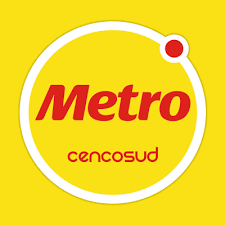</img></a>
<br>
<a href="https://www.tottus.com.pe">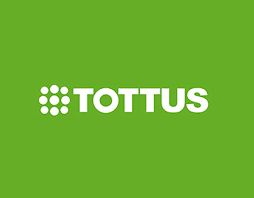</img></a>
<br>


Vamos a realizar un web scrapping a los sitios web de Plaza Vea, Metro y Tottus para comparar los precios de un producto de una canasta basica familiar. La información que esperamos obtener es:
- Descripcion del producto
- Precio del producto

Los objetivos que veremos en este programa son:
- Comparacion del producto en los 3 supermercados
- Envio Automatizado al correo del consultor

Este es el trabajo final..

**Integrantes:**

-Hillary Calderon 

-Enrique Garcia


In [11]:
####LIBRERIAS
import pandas as pd # libreria para trabajar con dataframes 
from selenium import webdriver # importar el driver 
import lxml #libreria para trabajar mejor archivos html
from selenium.webdriver.common.keys import Keys # insertar palabras en las busquedas 
from webdriver_manager.chrome import ChromeDriverManager #importar el instalador del drive 
from datetime import datetime # para detectar la fecha 
from selenium.webdriver.chrome.options import Options #agrega las opciones de navegacion en un driver 
import random # para generar tiempos de espera aleatorios 
import undetected_chromedriver.v2 as uc #no activa servicios anti-bot
import subprocess
import time
from selenium.webdriver.common.action_chains import ActionChains

In [6]:
#si no tienes el paquete selenium, descargarlo con:
#!pip3 install selenium
#!pip install webdriver_manager 
#!pip install datetime
#!pip install undetected_chromedriver
#!pip install --upgrade webdriver_manager


In [18]:
palabra="Mantequilla"
#OPCIONES DEL DRIVER -----
options = Options()#opciones del buscador 
options.add_argument("--incognito")#ventana incognito
options.add_argument("--start-maximized")# inicializar la ventana maximizada 
tienda=webdriver.Chrome(ChromeDriverManager().install(),options=options)# abrir el driver con las opciones descritas previamente 
tienda.implicitly_wait(4)# tiempo de espera para cuando se encuentra un error

#BUSQUEDA PLAZA VEA -----
tienda.get('https://www.plazavea.com.pe/') # ir al url de la pag
time.sleep(1) #tiempo de espera
p_busqueda=tienda.find_element("xpath",'.//div[@class="Header__search "]//input[@id="search_box"]')#buscar el recuadro de busqueda
p_busqueda.send_keys(palabra) #introducir la palabra 
time.sleep(1)
p_busqueda.send_keys(Keys.ENTER) #poner enter
time.sleep(2)
total_tiendas=[] #se crea una lista vacia
contador=1
while(1):
    productos=tienda.find_elements("xpath",'.//div[@class="HA Showcase Showcase--food"]')#buscar el contenedor de productos
    for producto in productos:
        detalles=[]
        # nombre
        nombre = producto.find_elements("xpath",'.//a[@class="Showcase__name"]')#buscar el contenedor de la información del producto
        if palabra.lower() in nombre[0].text.lower():#validador del nombre 
            nombre= [i.text for i in nombre][0] #sacar el nombre
            # precio
            precio = producto.find_elements("xpath",'.//span[@class="price"]')#sacar el precio
            #print(len(precio))
            precio=[i.text for i in precio][0]
            detalles.append("Plaza Vea") #se agrega el nombre del supermercado
            detalles.append(nombre) #se agrega el nombre de los productos
            detalles.append(float(precio.split(" ")[1])) #el precio convertido en número
            total_tiendas.append(detalles) # se agrega en nuestra lista vacia 
            print(detalles)
        else:
            continue
    contador=contador+1
    try:
        print(contador) #imprimimos el contador
        time.sleep(2)
        tienda.find_element("xpath",'.//span[@class="pagination__item page-number " and text()="'+str(contador)+'"]').click()
        time.sleep(2)
    except:
        break

        
#BUSQUEDA EN METRO----

tienda.get('https://www.metro.pe/')
time.sleep(1)
cuadro=tienda.find_element("xpath",'.//div[@class="search-autocomplete-wrapper"]//input[@id="search-autocomplete-input"]')#buscar contenedor de busqueda 
cuadro.send_keys(palabra)#insertar palabra
time.sleep(1)
cuadro.send_keys(Keys.ENTER)
time.sleep(1)
SCROLL_PAUSE_TIME = 3
# Obtener la altura del desplazamiento
last_height = tienda.execute_script("return document.body.scrollHeight")
while True:
    # Desplazar hacia abajo
    tienda.execute_script("window.scrollTo(0, document.body.scrollHeight-1000);")
    # Esperar a que la pagina cargue
    time.sleep(SCROLL_PAUSE_TIME)
    # Calcule la nueva altura de desplazamiento y compárela con la última altura de desplazamiento
    new_height = tienda.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
time.sleep(2)
productos=tienda.find_elements("xpath",'.//li[@layout="19ccd66b-b568-43cb-a106-b52f9796f5cd"]')#buscar al contenedor de productos 
metro=[]
for producto in productos:
    detalles=[]
    # nombre
    nombre = producto.find_elements("xpath",'.//a[@class="product-item__name"]')#extraer el nombre de los productos 
    if palabra.lower() in nombre[0].text.lower():
        nombre= [i.text for i in nombre][0]
        # precio
        precio = producto.find_elements("xpath",'.//span[@class="product-prices__value product-prices__value--best-price"]')
        try:
            precio=float([i.text for i in precio].split(" ")[0][2:])
        except:
            try:
                precio=float([i.text for i in precio][0][2:])
            except:
                continue
    else:
        continue
    detalles.append("Metro")
    detalles.append(nombre)
    detalles.append(precio)
    total_tiendas.append(detalles)
    print(detalles)

#BUSQUEDA TOTTUS----
tienda.get('https://www.tottus.com.pe')
time.sleep(1)
try:
    cuadro=tienda.find_element("xpath",'.//div[@class="jsx-3290144217 top"]//input[@id="catalystSearchBar"]')
    cuadro.send_keys(palabra)
    time.sleep(1)
    tienda.find_element("xpath","/html/body/div[1]/div[2]/div[2]/div[1]/div[1]/section/div[1]/div/button").click()
    time.sleep(1)
    while(1):
        try:
            pagina=tienda.find_element("xpath",".//ul[@class='jsx-1957748114']")
            print(pagina)
            productos=pagina.find_elements("xpath",".//li")
            for producto in productos:
                detalles=[]
                if not palabra.lower() in producto.find_element("xpath",".//h2").text.lower():
                    continue
                detalles.append("Tottus")
                detalles.append(producto.find_element("xpath",".//h2").text)
                try:
                    detalles.append(float(producto.find_element("xpath",".//span[@class='list price medium cmrPrice ']").text.split(" ")[1]))
                except:
                    continue
                total_tiendas.append(detalles)
                print(detalles)
            tienda.find_element("xpath",".//li[@class='next']").click()
            time.sleep(2)
        except:
            break   
except:
    tienda.get('https://www.tottus.com.pe')
    cuadro=tienda.find_element("xpath",'.//div[@class="jsx-3290144217 top"]//input[@id="catalystSearchBar"]')
    cuadro.send_keys(palabra)
    time.sleep(1)
    tienda.find_element("xpath","/html/body/div[1]/div[2]/div[2]/div[1]/div[1]/section/div[1]/div/button").click()
    time.sleep(1)
    while(1):
        try:
            pagina=tienda.find_element("xpath",".//ul[@class='jsx-1957748114']")
            productos=pagina.find_elements("xpath",".//li")
            for producto in productos:
                detalles=[]
                if not palabra.lower() in producto.find_element("xpath",".//h2").text.lower():
                    continue
                detalles.append("Tottus")
                detalles.append(producto.find_element("xpath",".//h2").text)
                try:
                    detalles.append(float(producto.find_element("xpath",".//span[@class='list price medium cmrPrice ']").text.split(" ")[1]))
                except:
                    continue
                total_tiendas.append(detalles)
                print(detalles)
            tienda.find_element("xpath",".//li[@class='next']").click()
            time.sleep(2)
        except:
            break   

tienda.close()# cerrar el driver
tienda.quit()# quitar el driver 


C:\Users\a\AppData\Local\Temp\ipykernel_10060\2887028272.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  tienda=webdriver.Chrome(ChromeDriverManager().install(),options=options)# abrir el driver con las opciones descritas previamente


['Plaza Vea', 'Mantequilla GLORIA Pote 390g', 18.9]
['Plaza Vea', 'Mantequilla GLORIA con Sal Barra 200g', 8.7]
['Plaza Vea', 'Mantequilla GLORIA con Sal Pote 200g', 10.4]
['Plaza Vea', 'Mantequilla con Sal LAIVE Barra 180g', 10.9]
['Plaza Vea', 'Mantequilla GLORIA Caja 90g', 5.9]
['Plaza Vea', 'Mantequilla LAIVE con Sal Barra 200g', 10.9]
['Plaza Vea', 'Crema a Base de Mantequilla Light con Sal LAIV...', 11.5]
['Plaza Vea', 'Mantequilla con Sal LAIVE Pote 180g', 11.5]
['Plaza Vea', 'Mantequilla LAIVE con Sal Barra 100g', 6.2]
['Plaza Vea', 'Mantequilla PLUSA 100% Natural Barra 200g', 14.9]
['Plaza Vea', 'Mantequilla con Sal DANLAC Frasco 180g', 15.5]
['Plaza Vea', 'Mantequilla sin Sal LAIVE Barra 180g', 10.9]
['Plaza Vea', 'Mantequilla DORINA 100% Vegetal Paquete 227g', 10.69]
['Plaza Vea', 'Mantequilla LA CHUGURANITA Caja 240g', 17.9]
['Plaza Vea', 'Mantequilla PRESIDENT con Sal Barra 200g', 16.79]
['Plaza Vea', 'Cereal en Barra DYFFERENT Mantequilla de Maní ...', 12.5]
['Plaza Vea',

In [20]:
TablaFinal= pd.DataFrame(total_tiendas,columns=['SUPERMERCADO','PRODUCTO','PRECIO'])
TablaFinal= TablaFinal.sort_values('PRECIO')# se ordena de acuerdo al precio
TablaFinal=TablaFinal.reset_index()# Reiniciar la indexazación 
TablaFinal=TablaFinal[['SUPERMERCADO','PRODUCTO','PRECIO']] #escogiendo columnas de interes
writer = pd.ExcelWriter('Precio.xlsx', engine='openpyxl')
TablaFinal.to_excel(writer,sheet_name=palabra,index=False)# convertir en un excel 
writer.save()# para guardar el contenido del excel

In [ ]:
def copy_file(filepath): #esta función ayuda a copiar el contenido del archivo en el portapapeles  
    cmd = r"gi '{}' | Set-Clipboard".format(filepath) # se busca copiar el folder y el contenido 
    subprocess.run(["powershell", "-command", cmd], shell=True)
correo=input("Ingrese el correo del usuario: ")
usuario='enriquegarciavera14@gmail.com' 
contraseña='***' 
options = uc.ChromeOptions()#se declaran los controles del driver 
#opciones que permiten entrar a los correos
options.add_argument("--disable-extensions") # desabilitar las extenciones del driver 
options.add_argument("--disable-popup-blocking") # desabilitar el bloqueo de cuentas del driver 
options.add_argument("--profile-directory=Default")
options.add_argument("--disable-plugins-discovery")
options.add_argument("--start-maximized")
options.add_argument("user_agent=DN")
buscador = uc.Chrome(chrome_options=options)
buscador.delete_all_cookies() # eliminando los cookies del driver 
buscador.implicitly_wait(4)#se declara un tiempo para ejecutar los comandos nuevamentes después de los errores
buscador.get('https://accounts.google.com/AccountChooser/identifier?service=mail&continue=https%3A%2F%2Fmail.google.com%2Fmail%2F&flowName=GlifWebSignIn&flowEntry=AccountChooser') 
buscador.find_element("xpath",'/html/body/div[1]/div[1]/div[2]/div/div[2]/div/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div/div[1]/div/div[1]/input').send_keys(usuario)#ingresa el usuario  
time.sleep(1) 
buscador.find_element("xpath",'/html/body/div[1]/div[1]/div[2]/div/div[2]/div/div/div[2]/div/div[2]/div/div[1]/div/div/button/span').click()
time.sleep(1) 
buscador.find_element("xpath",'/html/body/div[1]/div[1]/div[2]/div/div[2]/div/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div[1]/div/div/div/div/div[1]/div/div[1]/input').send_keys(contraseña) # colocar la contraseña
time.sleep(1) 
buscador.find_element("xpath",'/html/body/div[1]/div[1]/div[2]/div/div[2]/div/div/div[2]/div/div[2]/div/div[1]/div/div/button/span').click() 
time.sleep(10)
buscador.find_element("xpath",'/html/body/div[7]/div[3]/div/div[2]/div[1]/div[1]/div/div').click() 
time.sleep(6)
buscador.find_element("xpath",".//input[@class='agP aFw']").send_keys(correo)# ingresar el destinatario
buscador.find_element("xpath",".//input[@class='aoT']").send_keys("COMPARACIÓN DE SUPERMERCADOS") # asunto 
buscador.find_element("xpath",".//div[@class='Am Al editable LW-avf tS-tW']").click()# mensaje 
ActionChains(buscador).send_keys('Se le adjunta la comparación de precios del producto seleccionado').perform()#ingresar el mensaje
# enviar el archivo 
filepath = 'Precio.xlsx' #colocar la dirección del archivo en la pc  
copy_file(filepath)#copiar el archivo
ActionChains(buscador).key_down(Keys.CONTROL).send_keys('v').key_up(Keys.CONTROL).perform()#copiar el archivo en el casillero del mensaje 
time.sleep(10)
buscador.find_element("xpath",".//div[@id=':m8']").click()# darle click al boton de enviar 
print("ENVIADO") 
time.sleep(5)
buscador.close()# cerrar el driver
buscador.quit()# quitar el driver 